The `.hea` file indicates the header of the data to be read from study 40689238

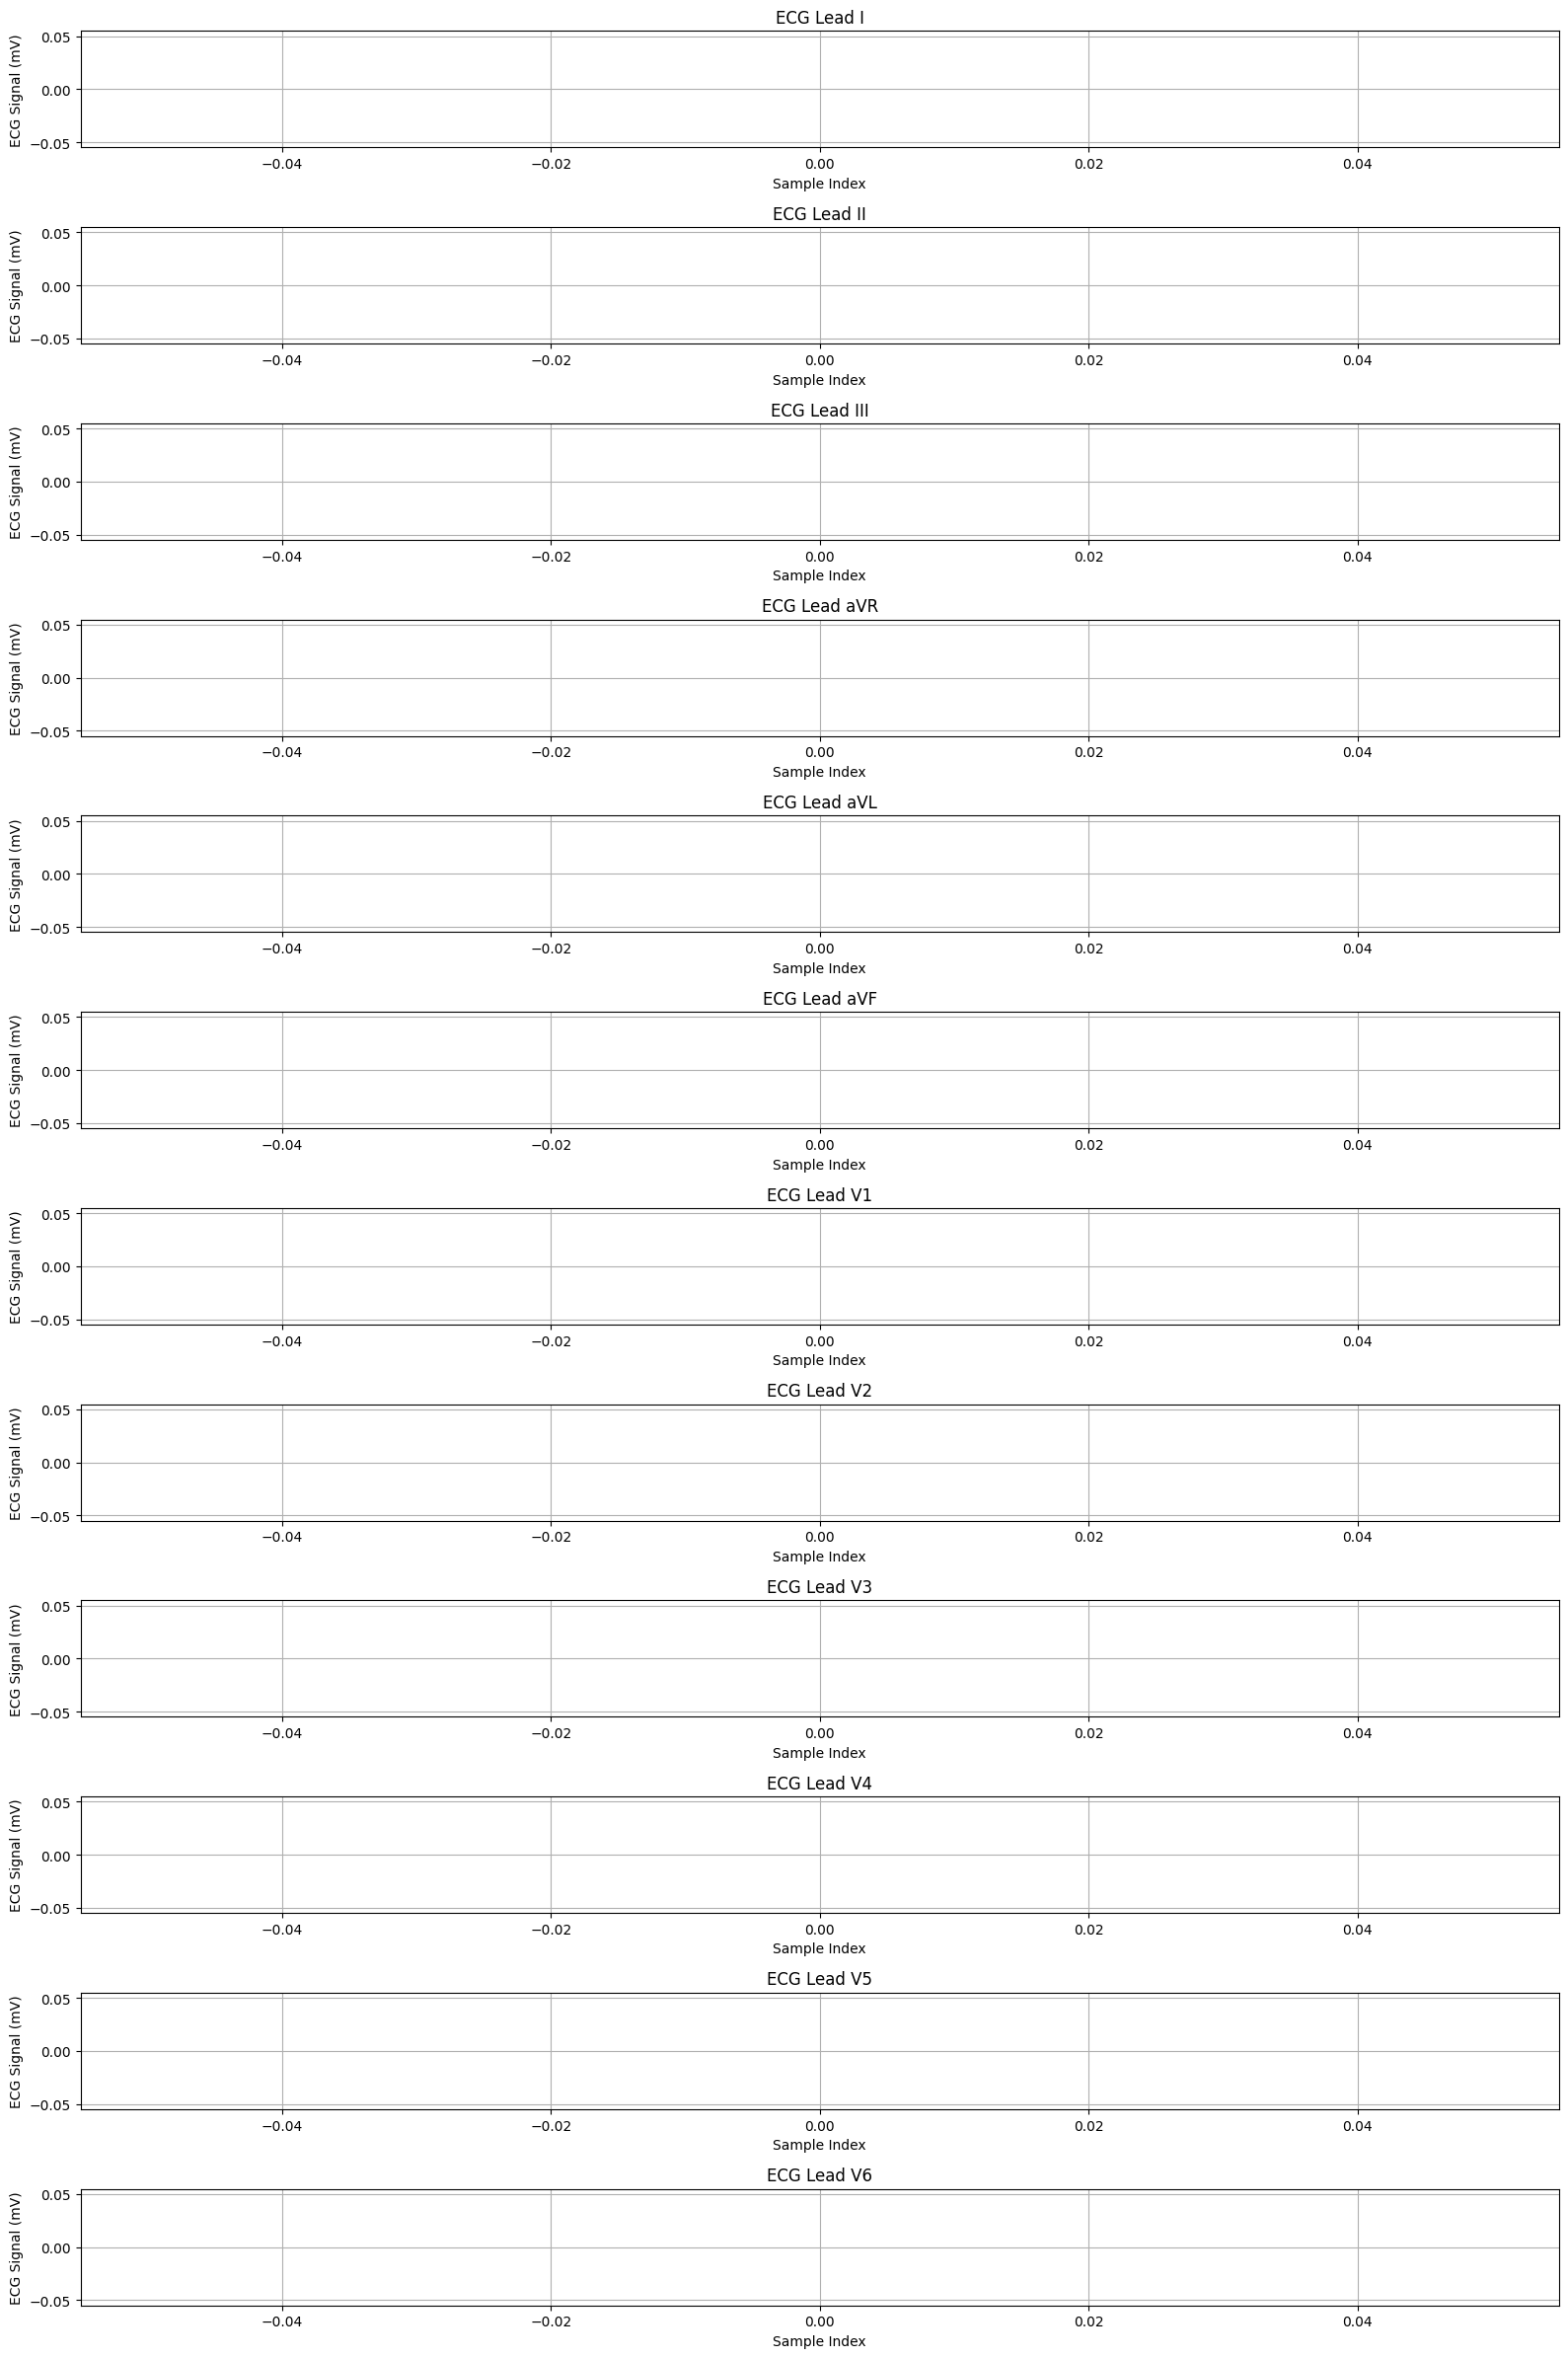

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

file_path = '../data/data_bin/40689238.dat'

# Define parameters
# fs = 500  # Sampling frequency in Hz
# start_time = "08:44:00"  # Given start time from .hea file
# desired_time = "08:44:10"  # Change this to the time you want

# # Convert times to seconds (HH:MM:SS to seconds)
# h_start, m_start, s_start = map(int, start_time.split(':'))
# h_desired, m_desired, s_desired = map(int, desired_time.split(':'))

# # Compute elapsed seconds from start time to desired time
# elapsed_seconds = (h_desired - h_start) * 3600 + (m_desired - m_start) * 60 + (s_desired - s_start)

# # Compute sample indices
# start_sample = elapsed_seconds * fs
# end_sample = start_sample + (5 * fs)  # Show 5 seconds of data


num_channels = 12
num_samples = 5000 # Per the .hea file

data = np.fromfile(file_path, dtype=np.int16)
data = data.reshape((num_channels, num_samples))

# Scale the data to mV (divide by 200 as indicated in the .hea file)
data = data / 200.0  # in mV

# Define the start and end sample indices for the zoomed-in range
start_sample = 1500
end_sample = 2500

# ECG channel names
channel_names = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

# Plotting each channel on a separate plot
plt.figure(figsize=(16, 24))  # Adjust the figure size as needed
for i in range(num_channels):
    plt.subplot(num_channels, 1, i + 1)
    # plt.plot(data[i], label=f'Lead {channel_names[i]}', color='b')
    plt.plot(data[i][int(start_sample):int(end_sample)], label=f'Lead {channel_names[i]}', color='b')
    plt.xlabel('Sample Index')
    plt.ylabel('ECG Signal (mV)')
    plt.title(f'ECG Lead {channel_names[i]}')
    plt.grid(True)
    plt.tight_layout()  # Ensures there is no overlap between subplots

plt.show()
